# Task: 7-sided dice using a 6-sided dice
### Brainstorming

**Consideration:** 7-sided die has more uncertainty than a 6-sided dice

**Idea:** create more uncertainty with more dice throws

**Method:** mapping n-throws of 6-sided dice to a 7-sided dice

**Proposed mapping:** n-throws of 6 sided dice ⇨ index ⇨ 7-sided dice

In [1]:
#First, map the outcome of a n-throws of 6-sided into an index for convenience:
def ind(throws):
    ind = 0
    for k,v in enumerate(throws[:-1]):
        ind += (v-1)*6**(len(throws)-1-k)
    return ind+throws[-1]

In [2]:
#3-throws of 6-sided dice, sample 1:
ind([1,1])

1

In [3]:
#3-throws of 6-sided dice, sample 2:
ind([1,2])

2

In [4]:
#3-throws of 6-sided dice, sample 3:
ind([1,6])

6

In [5]:
#3-throws of 6-sided dice, sample 4:
ind([2,1])

7

In [6]:
#3-throws of 6-sided dice, sample 5:
ind([6,6])

36

In [7]:
#Now to a 7-sided dice naively
def map1(index):
    #We have 36 outcomes, a naive way to do this is by binning the outcomes:
    if(index<=5):  # 5 outcomes
        return 1
    if(index<=10): # 5 outcomes
        return 2
    if(index<=15): # 5 outcomes
        return 3
    if(index<=20): # 5 outcomes
        return 4
    if(index<=25): # 5 outcomes
        return 5
    if(index<=30): # 5 outcomes
        return 6
    return 7       # 6 outcomes (biased)

In [8]:
#3-throws of 6-sided dice, sample 1:
map1(ind([1,1]))

1

In [9]:
#3-throws of 6-sided dice, sample 2:
map1(ind([1,2]))

1

In [10]:
#3-throws of 6-sided dice, sample 3:
map1(ind([1,5]))

1

In [11]:
#3-throws of 6-sided dice, sample 4:
map1(ind([1,6]))

2

In [12]:
#3-throws of 6-sided dice, sample 5:
map1(ind([6,6]))

7

### How do we improve it?
Issues:
-   Our second mapping is biased towards the side 7 of our simulated 7-sided dice
-   Our code assumes 2-throws, doesn't generalize to n-throws

Fix: 
-   rejection sampling ⇨ fixes first issue, but mapping is not 100% deterministic, requires generating another sample

And let's refactor the code to generalize to any amount of throws

In [13]:
from numpy.random import randint, seed

seed(123)

def generate(n_throws):
    return randint(1,7,n_throws)

def map2(throws):
    n_sides = 7
    n_throws = len(throws)
    if(n_throws == 1):
        raise Exception('Not enough uncertainty! Increase the number of throws!')
    n_outcomes = 6**n_throws
    n_partitions = n_outcomes//n_sides
    index = ind(throws)
    partition_index = -(index//(-n_partitions))
    if(partition_index >= n_sides+1):
        #this could create an infinite recursion
        #but it's impossible probabilistically
        return map2(generate(n_throws))
    return partition_index

In [14]:
#mapping is deterministic for some throws(sample 1a):
map2([1,1])

1

In [15]:
#mapping is deterministic for some throws(sample 1b):
map2([1,1])

1

In [16]:
#mapping is deterministic for some throws(sample 2a):
map2([1,2])

1

In [17]:
#mapping is deterministic for some throws(sample 2b):
map2([1,2])

1

In [18]:
#mapping is nondeterministic for some throws(sample 3a):
map2([6,6])

7

In [19]:
#mapping is nondeterministic for some throws(sample 3b):
map2([6,6])

6

In [20]:
#Visualization
import matplotlib.pyplot as plt

#Example 1:
num_throws = 2
num_tthrows = 10000

throws_of_throws = [[randint(1,7) for j in range(num_throws)] for i in range(num_tthrows)]
throws_of_throws[0]

[2, 4]

In [21]:
#Applying mapping(map1):
throws_7sided = [map1(ind(throws)) for throws in throws_of_throws]
throws_7sided[0]

2

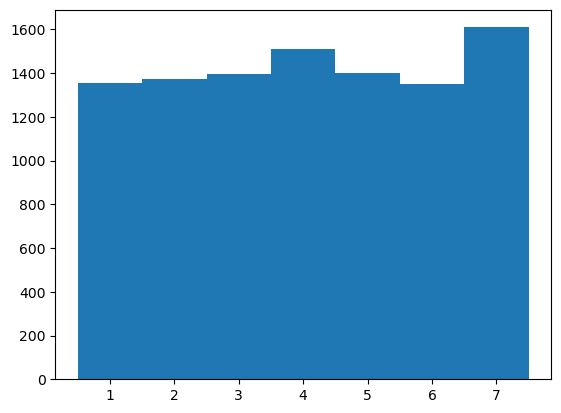

In [22]:
#Now the histogram(map1):
plt.hist(throws_7sided, bins=[side for side in range(1,9)], align='left');

Observe how the side 7 is biased.

In [23]:
#Now map2 using the same data for comparison
throws_7sided = [map2(throws) for throws in throws_of_throws]
throws_7sided[0]

2

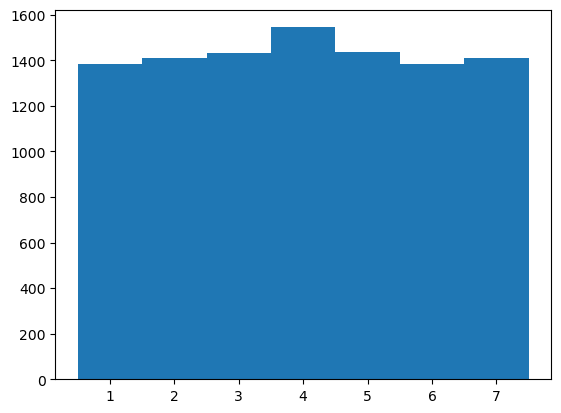

In [24]:
#Now the histogram(map2):
plt.hist(throws_7sided, bins=[side for side in range(1,9)], align='left');

Now it's gone.

In [25]:
#Generalizing map2
def map3(throws,to_n_sides):
    n_sides = to_n_sides
    n_throws = len(throws)
    n_outcomes = 6**n_throws
    if(n_sides > n_outcomes):
        raise Exception('Not enough uncertainty! Increase the number of throws or decrease the number of sides to simulate!')
    n_partitions = n_outcomes//n_sides
    index = ind(throws)
    partition_index = -(index//(-n_partitions))
    if(partition_index >= n_sides+1):
        #this could create an infinite recursion
        #but it's impossible probabilistically
        return map3(generate(n_throws),to_n_sides)
    return partition_index

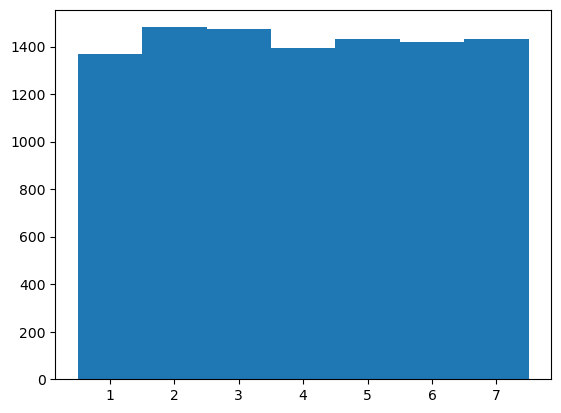

In [26]:
#Example 2:
num_throws = 2
num_tthrows = 10000

to_n_sides = 7

throws_of_throws = [[randint(1,7) for j in range(num_throws)] for i in range(num_tthrows)]
throws_7sided = [map3(throws,to_n_sides) for throws in throws_of_throws]
plt.hist(throws_7sided, bins=[side for side in range(1,to_n_sides+2)], align='left');

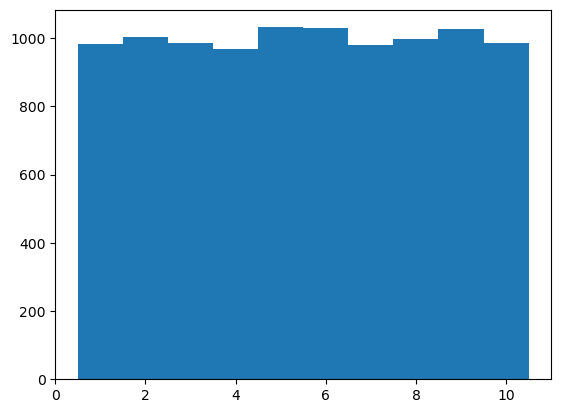

In [27]:
#Example 3:
num_throws = 2
num_tthrows = 10000

to_n_sides = 10

throws_of_throws = [[randint(1,7) for j in range(num_throws)] for i in range(num_tthrows)]
throws_7sided = [map3(throws,to_n_sides) for throws in throws_of_throws]
plt.hist(throws_7sided, bins=[side for side in range(1,to_n_sides+2)], align='left');

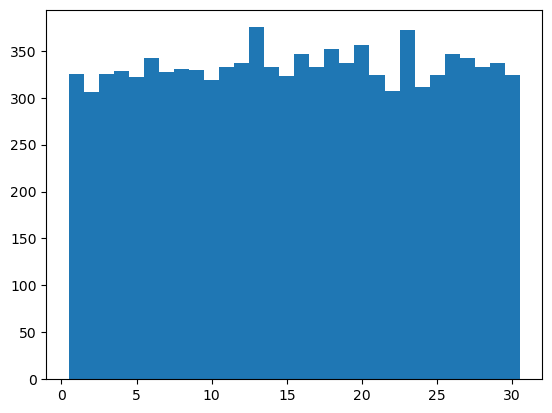

In [28]:
#Example 4:
num_throws = 2
num_tthrows = 10000

to_n_sides = 30

throws_of_throws = [[randint(1,7) for j in range(num_throws)] for i in range(num_tthrows)]
throws_7sided = [map3(throws,to_n_sides) for throws in throws_of_throws]
plt.hist(throws_7sided, bins=[side for side in range(1,to_n_sides+2)], align='left');

In [29]:
#Example 5(not possible according to our mapping):
num_throws = 2
num_tthrows = 10000

#Since 6**2 = 36 which is less than 37
to_n_sides = 37

throws_of_throws = [[randint(1,7) for j in range(num_throws)] for i in range(num_tthrows)]
throws_7sided = [map3(throws,to_n_sides) for throws in throws_of_throws]
plt.hist(throws_7sided, bins=[side for side in range(1,to_n_sides+2)], align='left');

Exception: Not enough uncertainty! Increase the number of throws or decrease the number of sides to simulate!

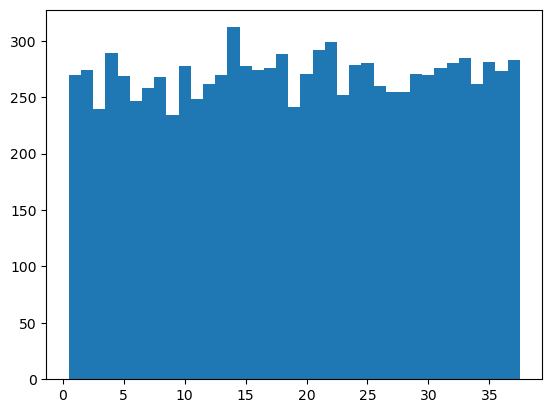

In [ ]:
#Example 6(increasing one more throw):
num_throws = 3
num_tthrows = 10000

to_n_sides = 37

throws_of_throws = [[randint(1,7) for j in range(num_throws)] for i in range(num_tthrows)]
throws_7sided = [map3(throws,to_n_sides) for throws in throws_of_throws]
plt.hist(throws_7sided, bins=[side for side in range(1,to_n_sides+2)], align='left');

### Conclusion
Our final mapping is capable of taking throws of 6-sided dice to any k-sided dice, a few considerations:
- To simulate a k-sided dice, the number of throws(num_throws) must be large enough, otherwise we must introduce some form of uncertainty
- The number of throws of n-throws(num_tthrows) is mapped to number of throws of k-sided dice